Its a statistical plotting library that is built on top of matplotlib. Designed to work
with Pandas dataframe objects. Seaborn looks alot like ggplot in R. Can be used effectively with Pandas. 

In [2]:
#Distribution plots
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


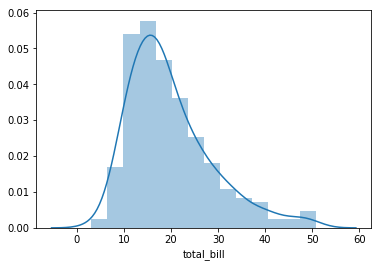

In [6]:
#Distribution plot - allows us to look at the distribution of a univariate variable. Really 
#easy way to make histograms
sns.distplot(tips['total_bill'])

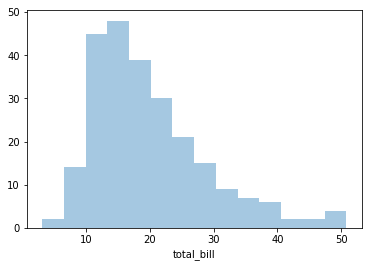

In [7]:
sns.distplot(tips['total_bill'],kde=False)

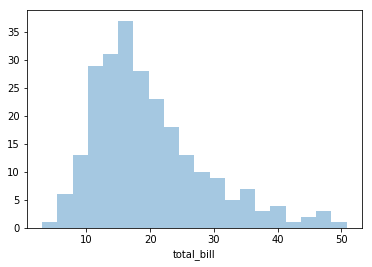

In [9]:
sns.distplot(tips['total_bill'],kde=False,bins=20)

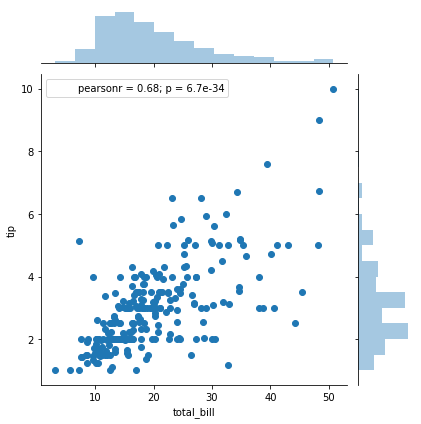

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips) #just pass in names of columns

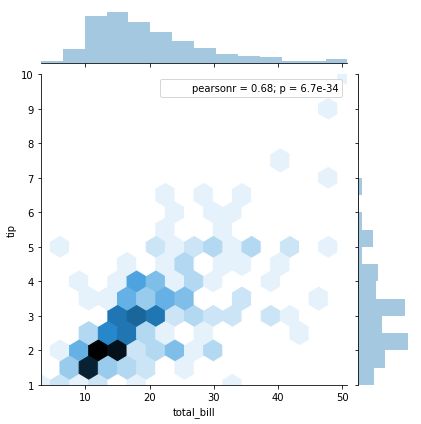

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

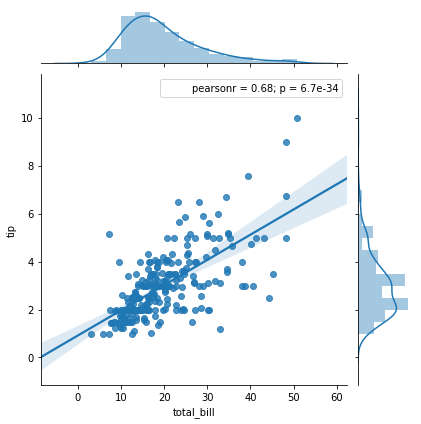

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg') #makes linear regression line

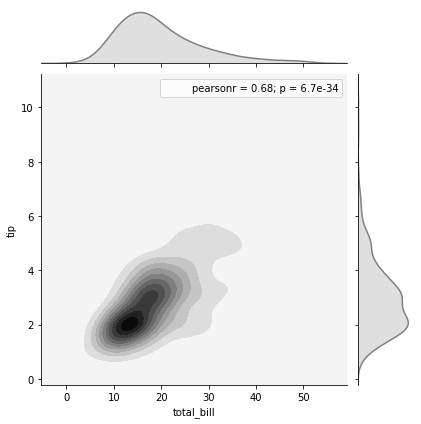

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde',color='gray')

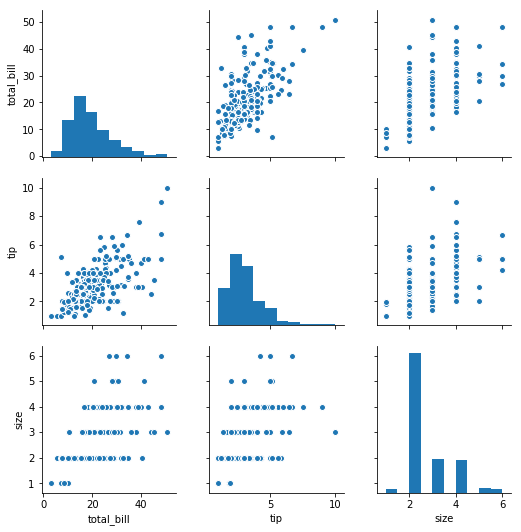

In [17]:
sns.pairplot(tips) #plots all the possilbe combinations of datasets 

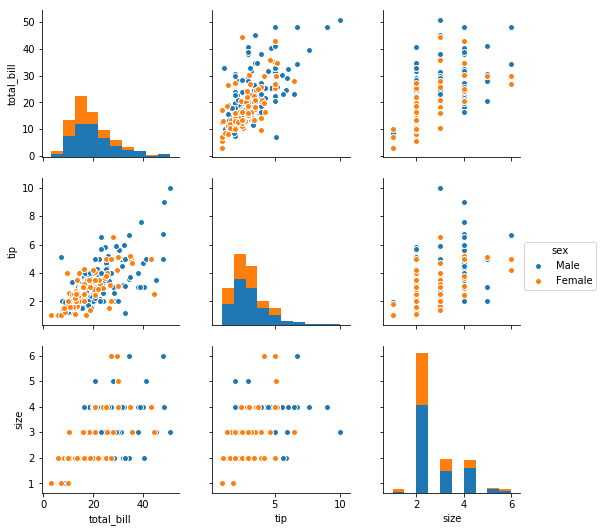

In [18]:
sns.pairplot(tips,hue='sex') #colors the datapoints based on hue 

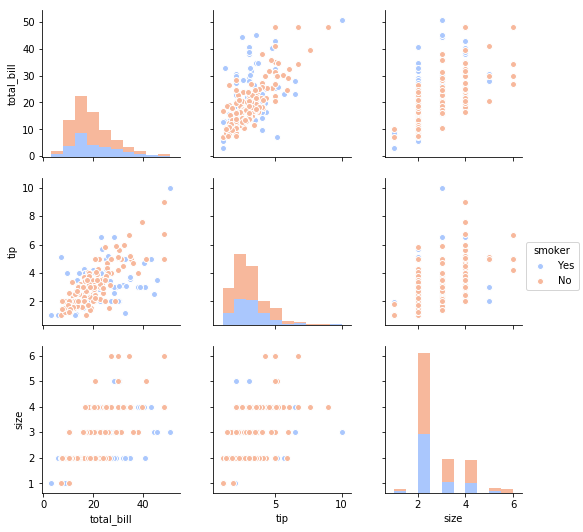

In [20]:
sns.pairplot(tips,hue='smoker',palette='coolwarm')

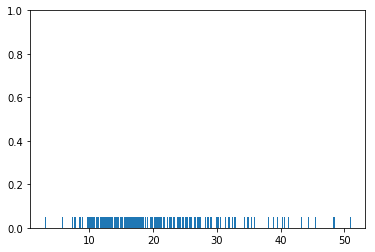

In [21]:
sns.rugplot(tips['total_bill']) #draw a mark for every single point

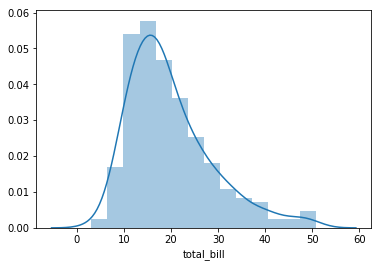

In [22]:
sns.distplot(tips['total_bill'])

(0, 1)

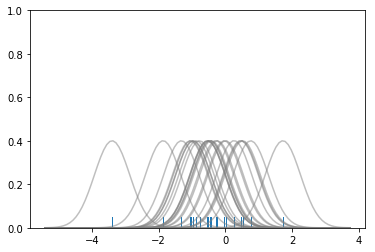

In [24]:
#The kde stands for kernal density estimation plots - an indication of the 
#density if dashes plotted in the rugplot
#Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

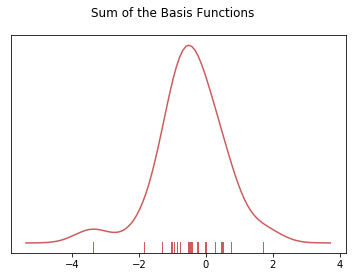

In [25]:
#summing these normal distributons gives the kde plot
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

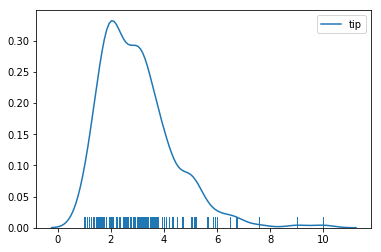

In [26]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

## Catagorical plots 

In [27]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


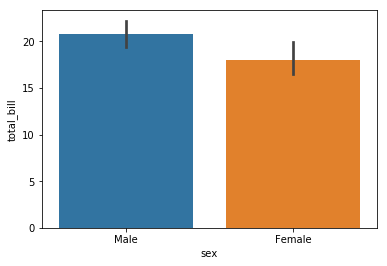

In [29]:
sns.barplot(x='sex',y='total_bill',data=tips) #easy way of making bar plots 

In [ ]:
import numpy as np

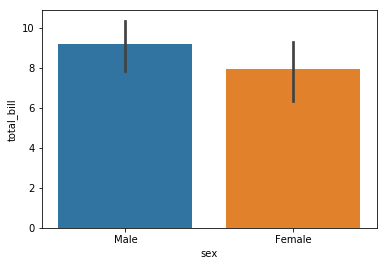

In [30]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

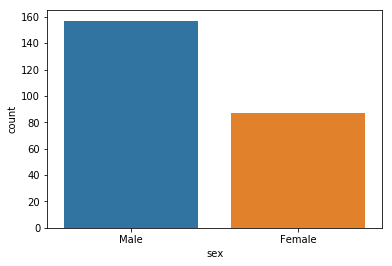

In [31]:
sns.countplot(x='sex',data=tips) #graphical representation of the occurences of
#some data categories

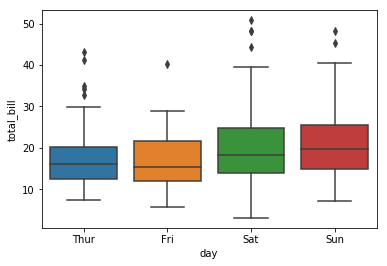

In [32]:
#BW plot
sns.boxplot(x='day',y='total_bill',data=tips)

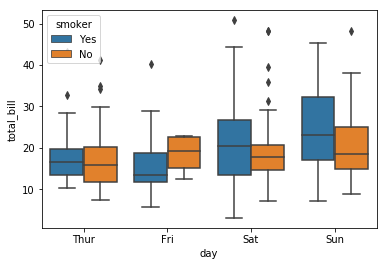

In [33]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker')

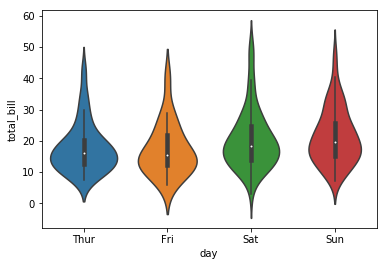

In [34]:
#Violin plot
sns.violinplot(x='day',y='total_bill',data=tips)

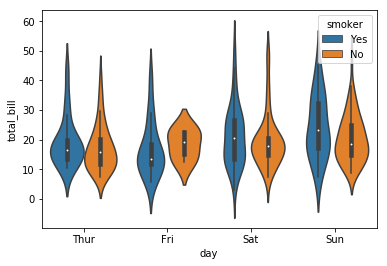

In [35]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker')

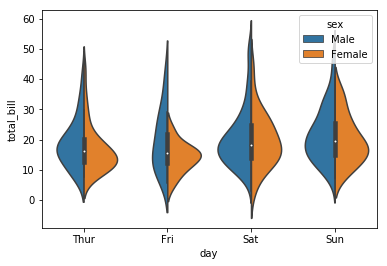

In [36]:
#These show the kernel density distribution of the data
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split='True')

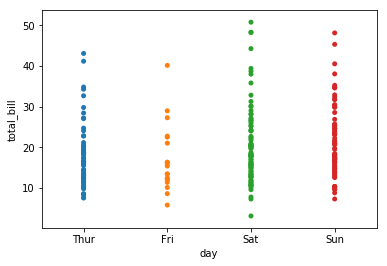

In [37]:
sns.stripplot(x='day',y='total_bill',data=tips)

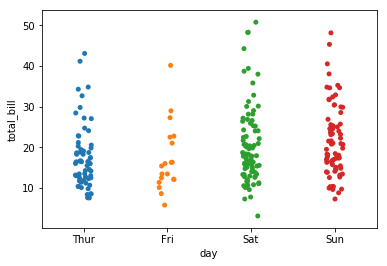

In [38]:
#jitter adds a little random noise to improve the what this looks like
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


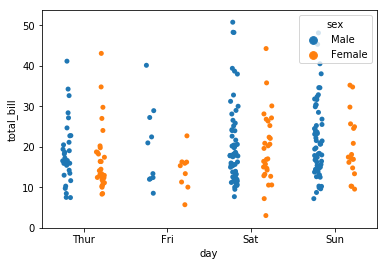

In [39]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)

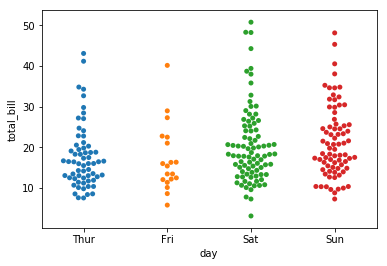

In [41]:
sns.swarmplot(x='day',y='total_bill',data=tips)

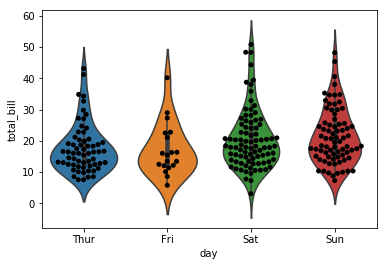

In [42]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

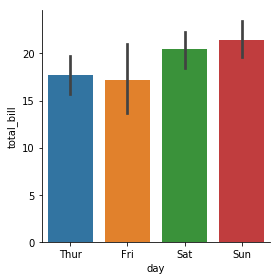

In [43]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')

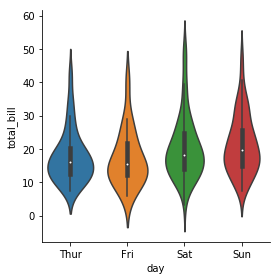

In [44]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='violin')

## Matrix plots and heatmaps

In [4]:
flights = sns.load_dataset('flights')

In [5]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


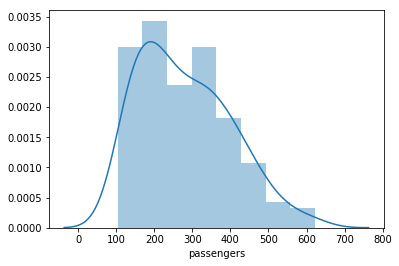

In [49]:
sns.distplot(flights['passengers'])

In [55]:
tc = tips.corr() #data is in matrix from

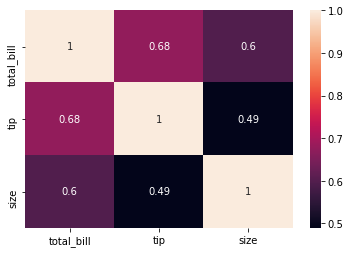

In [56]:
sns.heatmap(tc,annot=True)

In [6]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

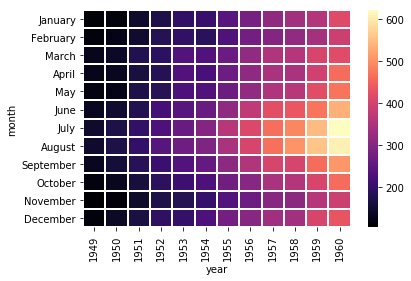

In [64]:
#This is putting the data in a matrix form for sns heatmap
sns.heatmap(fp,cmap='magma',linecolor='white',linewidth=1)

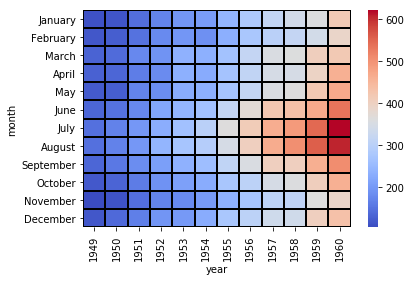

In [65]:
sns.heatmap(fp,cmap='coolwarm',linecolor='black',linewidth=1)

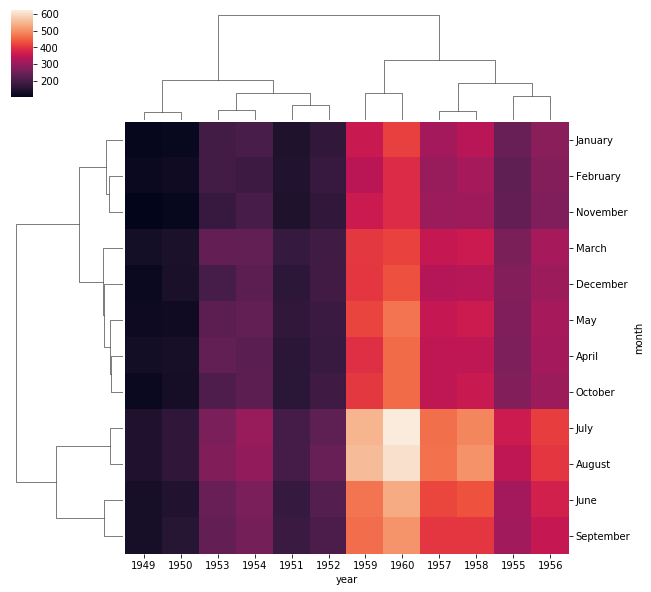

In [66]:
sns.clustermap(fp)
#This shows cols and rows that are most similar to one another

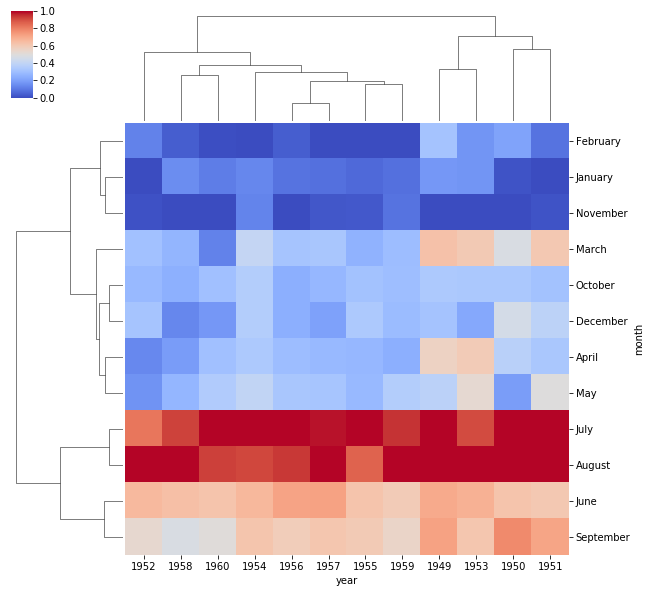

In [7]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [8]:
#Gridding
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

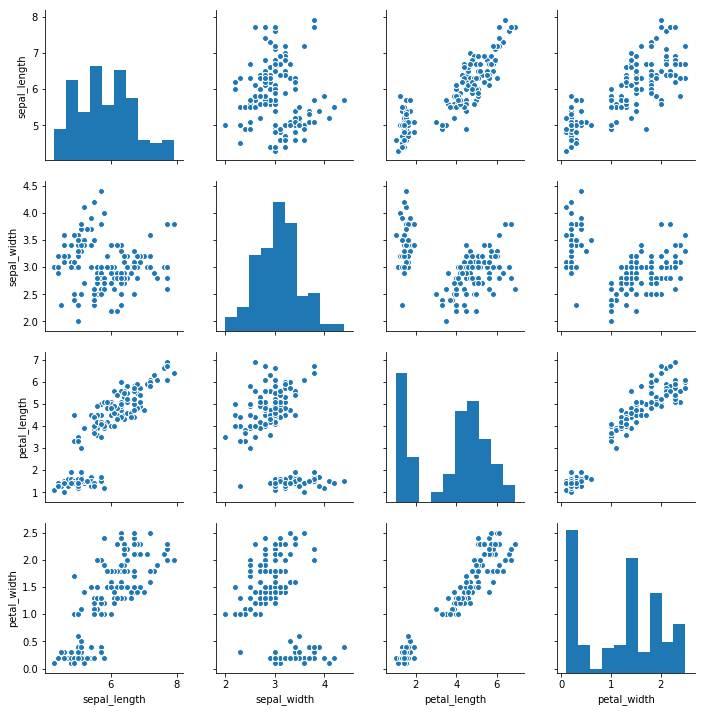

In [10]:
sns.pairplot(iris)

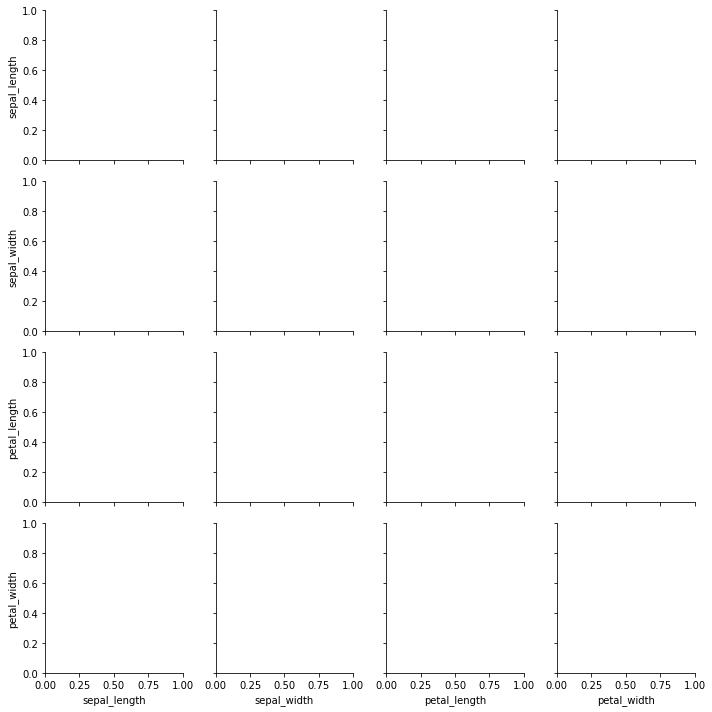

In [11]:
sns.PairGrid(iris) #gives us a set of subplots

/Users/rmartinshort/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


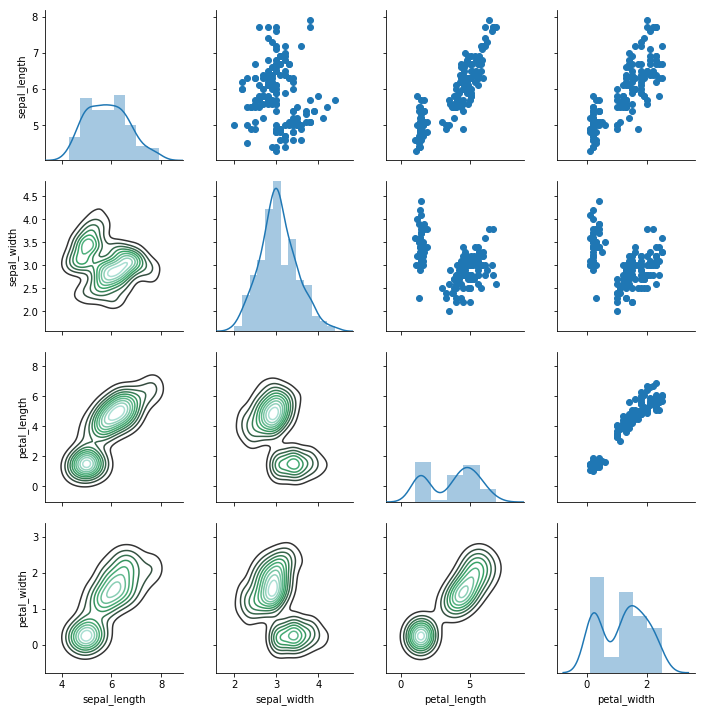

In [15]:
import matplotlib.pylab as plt
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)

#plots above the diagonal 
g.map_upper(plt.scatter)

#plots below the diagonal
g.map_lower(sns.kdeplot)

In [16]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


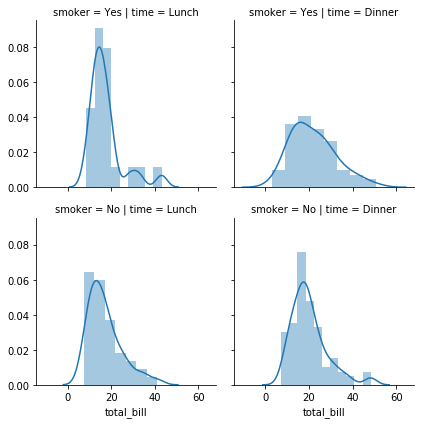

In [18]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill')
#This divides the plots by the variables present in the rows and cols
#Allows for separation by various features

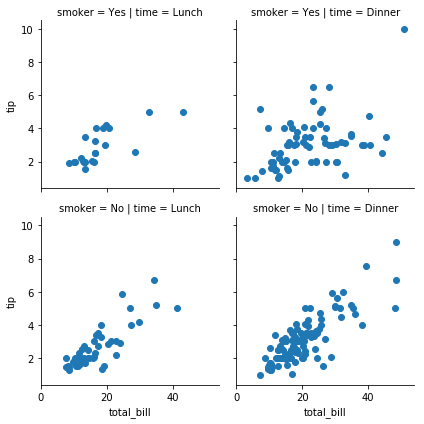

In [20]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')
#This is the case where we want to plot two variables on each panel 

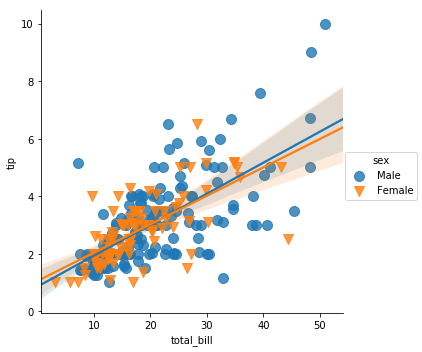

In [25]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],
          scatter_kws={'s':100})

#Can pass some matplotlib arguments to the lmplot etc

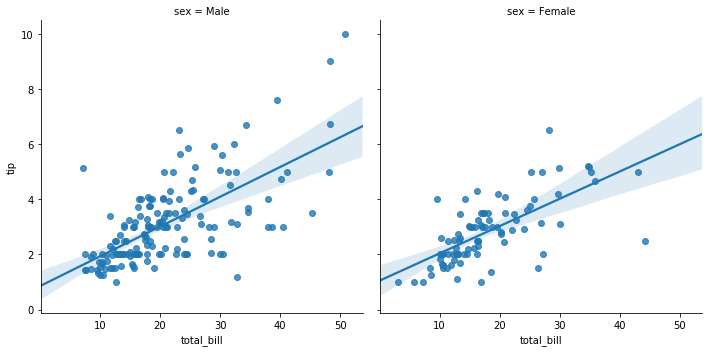

In [26]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

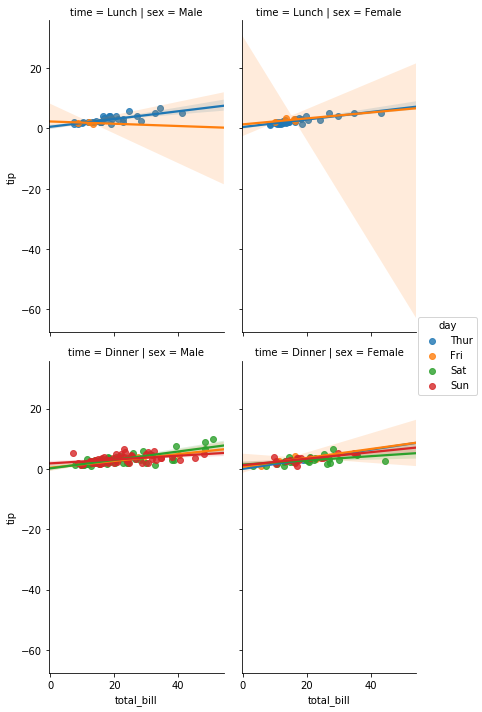

In [30]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time',hue='day',
          aspect=0.6)

## Style and color 


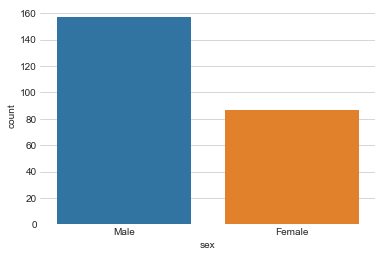

In [33]:
sns.set_style('whitegrid') #set various plotting styles 
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True) #remove some marker ticks

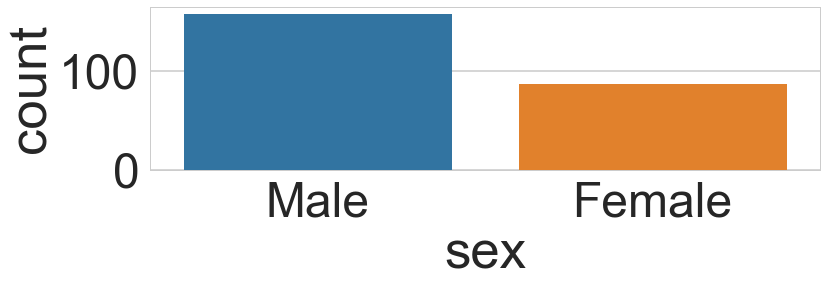

In [36]:
sns.set_context('poster',font_scale=3) #Can set various plotting scales and types 
plt.figure(figsize=(12,3)) #matplotlib will set the figure size and aspect ratio etc
sns.countplot(x='sex',data=tips)

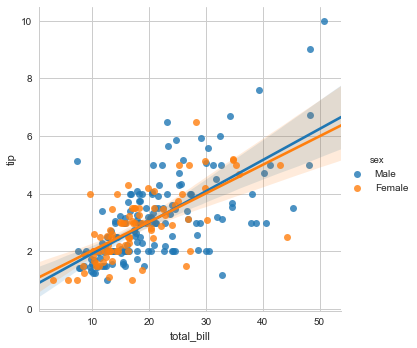

In [39]:
sns.set_context('notebook',font_scale=1) #Can set various plotting scales and types 
sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips)

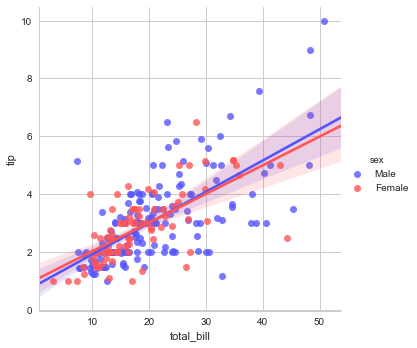

In [40]:
sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips,palette='seismic')